In [11]:
import ROOT

In [25]:
filenames = ["PurityFits/Mh_purityPerBin_cth-1--0.17.root","PurityFits/Mh_purityPerBin_cth-0.17-0.12.root","PurityFits/Mh_purityPerBin_cth0.12-1.root"]

In [26]:
f0 = ROOT.TFile(filenames[0])
f1 = ROOT.TFile(filenames[1])
f2 = ROOT.TFile(filenames[2])
f0.ls()
f1.ls()
f2.ls()

TFile**		PurityFits/Mh_purityPerBin_cth-1--0.17.root	
 TFile*		PurityFits/Mh_purityPerBin_cth-1--0.17.root	
  KEY: TGraphErrors	Graph;1	
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.
TFile**		PurityFits/Mh_purityPerBin_cth-0.17-0.12.root	
 TFile*		PurityFits/Mh_purityPerBin_cth-0.17-0.12.root	
  KEY: TGraphErrors	Graph;1	
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.
TFile**		PurityFits/Mh_purityPerBin_cth0.12-1.root	
 TFile*		PurityFits/Mh_purityPerBin_cth0.12-1.root	
  KEY: TGraphErrors	Graph;1	
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.


In [27]:
def jitter_graph_x(graph, dx):
    x_vals = [graph.GetX()[i] for i in range(graph.GetN())]
    y_vals = [graph.GetY()[i] for i in range(graph.GetN())]
    for i in range(len(x_vals)):
        graph.SetPoint(i,x_vals[i]+dx,y_vals[i])

In [28]:
gr0 = f0.Get("Graph")
gr0.SetLineColor(ROOT.kRed-7)
gr0.SetMarkerColor(ROOT.kRed-7)
gr1 = f1.Get("Graph")
gr1.SetLineColor(ROOT.kBlue-7)
gr1.SetMarkerColor(ROOT.kBlue-7)
gr2 = f2.Get("Graph")
gr2.SetLineColor(ROOT.kOrange-5)
gr2.SetMarkerColor(ROOT.kOrange-5)
jitter_amount = 0.002
# Apply jitters: 
jitter_graph_x(gr0, -jitter_amount)   # shift left a bit
jitter_graph_x(gr1, 0.0)               # no shift
jitter_graph_x(gr2, jitter_amount)   # shift right a bit

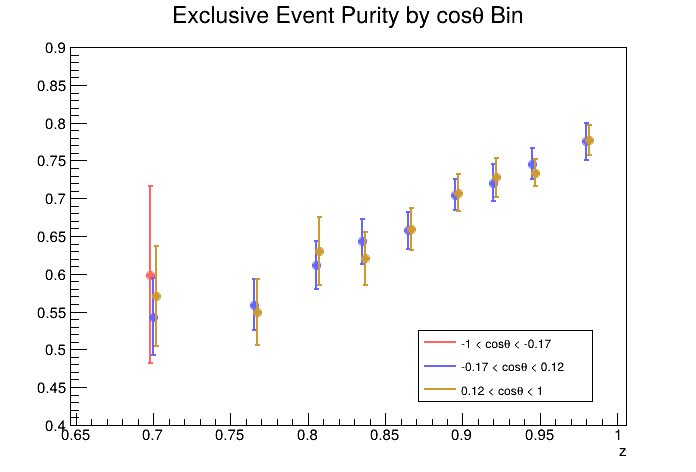

In [30]:
c = ROOT.TCanvas()
leg = ROOT.TLegend(0.6,0.15,0.85,0.3)
leg.AddEntry(gr0,"-1 < cos#theta < -0.17","l")
leg.AddEntry(gr1,"-0.17 < cos#theta < 0.12","l")
leg.AddEntry(gr2,"0.12 < cos#theta < 1","l")

gr0.SetTitle("Exclusive Event Purity by cos#theta Bin")
gr0.GetYaxis().SetRangeUser(0.4,0.9)
gr0.GetXaxis().SetRangeUser(0.65,1)
gr0.Draw("AP")
gr1.Draw("P SAME")
gr2.Draw("P SAME")
leg.Draw()
c.Draw()

In [47]:
jitter_graph_x(gr0,jitter_amount)

[0.7, 0.765, 0.8049999999999999, 0.835, 0.865, 0.895, 0.92, 0.9450000000000001, 0.98]
[0.71, 0.775, 0.815, 0.845, 0.875, 0.905, 0.93, 0.9550000000000001, 0.99]
